In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
import scipy.stats as stats

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
df = pd.read_csv ('ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


AttributeError: 'AxesSubplot' object has no attribute 'set_ylabels'

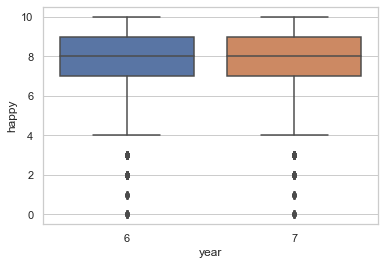

In [4]:
#Let's show how happy people by years
sns.set(style="whitegrid")
g = sns.boxplot(y='happy', x = 'year', 
                 data=df)
g.set_ylabels("happy")
g.set_xlabels("year")
plt.title('Barplot: happy by year')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'set_ylabels'

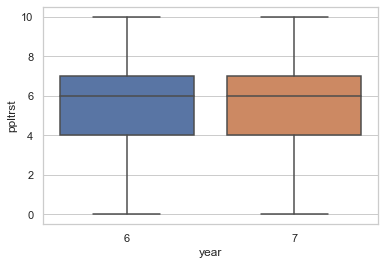

In [5]:
#Let's show how happy people by years
sns.set(style="whitegrid")
g = sns.boxplot(y='ppltrst', x = 'year', 
                 data=df)
g.set_ylabels("ppltrst")
g.set_xlabels("year")
plt.title('Barplot: ppltrst by year')
plt.show()

In [6]:
Did people become less trusting from 2012 to 2014? Compute results for each country in the sample

SyntaxError: invalid syntax (<ipython-input-6-a4b4ad3ef4eb>, line 1)

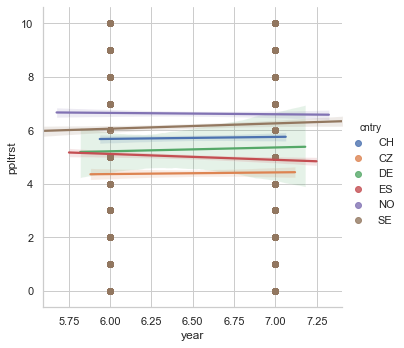

In [7]:
sns.lmplot(x="year", y="ppltrst", hue="cntry",
           data=df);

In [8]:
df.groupby(['year','cntry']).mean()

idno     tvtot   ppltrst   pplfair    pplhlp     happy  \
year cntry                                                                   
6    CH     1.480680e+03  3.141192  5.677878  6.350649  5.726329  8.088312   
     CZ     1.445666e+03  5.142420  4.362519  4.959938  4.503058  6.770898   
     DE     1.100048e+07  4.928571  5.214286  5.692308  5.000000  7.428571   
     ES     1.467607e+03  3.977741  5.114592  5.354253  4.748344  7.548680   
     NO     1.430671e+04  3.837209  6.649315  6.927298  6.085048  8.251719   
     SE     1.765173e+03  3.691630  6.058499  6.559116  6.039691  7.907387   
7    CH     1.480680e+03  3.065977  5.751617  6.219922  5.671410  8.116429   
     CZ     1.445666e+03  4.686930  4.424658  4.904255  4.465753  6.914110   
     DE     1.100048e+07  3.071429  5.357143  6.714286  5.857143  7.857143   
     ES     1.467607e+03  4.015677  4.895128  5.340284  4.326716  7.419967   
     NO     1.430671e+04  3.705882  6.598630  6.861454  6.001374  7.915185   
     SE     1.765173e+03  3.585447  6.257709  6.836464  6.082781  7.946961   

             sclmeet    sclact      gndr       agea   partner  
year cntry                                                     
6    CH     5.080519  2.704724  1.514877  47.344415  1.349288  
     CZ     4.648855  2.613354  1.515198  47.053208  1.432927  
     DE     5.000000  2.857143  1.571429  52.071429  1.357143  
     ES     5.228737  2.560266  1.515251  47.700340  1.372727  
     NO     5.530780  2.965565  1.471956  46.364903  1.348422  
     SE     5.528115  2.917960  1.471366  48.673563  1.387665  
7    CH     5.160622  2.781699  1.512290  46.141145  1.376455  
     CZ     4.445802  2.703077  1.535494  45.552262  1.420245  
     DE     4.428571  2.714286  1.571429  59.714286  1.142857  
     ES     5.260116  2.616878  1.493817  48.048223  1.398347  
     NO     5.302326  2.859097  1.461012  46.707521  1.390411  
     SE     5.426211  2.879425  1.482379  49.403189  1.386564

In [9]:
from scipy.stats import ttest_ind

In [17]:
cat1 = df[df['year']==6].groupby('cntry').mean()
cat2 = df[df['year']==7].groupby('cntry').mean()

In [18]:
cat2

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
cntry,,,,,,,,,,,,
CH,1.480680e+03,7,3.065977,5.751617,6.219922,5.671410,8.116429,5.160622,2.781699,1.512290,46.141145,1.376455
CZ,1.445666e+03,7,4.686930,4.424658,4.904255,4.465753,6.914110,4.445802,2.703077,1.535494,45.552262,1.420245
DE,1.100048e+07,7,3.071429,5.357143,6.714286,5.857143,7.857143,4.428571,2.714286,1.571429,59.714286,1.142857
ES,1.467607e+03,7,4.015677,4.895128,5.340284,4.326716,7.419967,5.260116,2.616878,1.493817,48.048223,1.398347
NO,1.430671e+04,7,3.705882,6.598630,6.861454,6.001374,7.915185,5.302326,2.859097,1.461012,46.707521,1.390411
SE,1.765173e+03,7,3.585447,6.257709,6.836464,6.082781,7.946961,5.426211,2.879425,1.482379,49.403189,1.386564


In [19]:
ttest_ind(cat1['ppltrst'], cat2['ppltrst'])

Ttest_indResult(statistic=-0.07405571902413619, pvalue=0.9424264810347233)

We can't prove that this is a significant difference since p value is more than 0.05.

## Does people bacome less happier?

In [20]:
ttest_ind(cat1['happy'], cat2['happy'])

Ttest_indResult(statistic=-0.10156416098570785, pvalue=0.9211102400394623)

We can't prove that this is a significant difference since p value is more than 0.05.

## Who reported watching more TV in 2012, men or women?

In [42]:
df6 = df[df['year']==6]

In [43]:
cat1 = df6[df6['gndr']==1].groupby('cntry').mean()
cat2 = df6[df6['gndr']==2].groupby('cntry').mean()

In [44]:
ttest_ind(cat1['tvtot'], cat2['tvtot'])

Ttest_indResult(statistic=0.08622485386090141, pvalue=0.932989702221862)

We can't prove that this is a significant difference since p value is more than 0.05.

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [53]:
cat1 = df6[df6['partner']==1].groupby('cntry').mean()
cat2 = df6[df6['partner']==2].groupby('cntry').mean()

In [54]:
cat1,cat2.info

(               idno  year     tvtot   ppltrst   pplfair    pplhlp     happy  \
 cntry                                                                         
 CH     1.462165e+03     6  3.193227  5.805169  6.466135  5.808765  8.266932   
 CZ     1.457218e+03     6  5.216802  4.336043  5.005450  4.447439  7.013624   
 DE     1.100050e+07     6  4.777778  5.444444  6.500000  4.875000  8.000000   
 ES     1.485196e+03     6  4.044796  5.144928  5.330251  4.774108  7.739130   
 NO     1.452249e+04     6  3.871579  6.677215  6.968354  6.160338  8.440678   
 SE     1.531570e+03     6  3.757194  6.248649  6.702703  6.219424  8.233813   
 
         sclmeet    sclact      gndr       agea  partner  
 cntry                                                    
 CH     4.892000  2.682093  1.497018  51.032787      1.0  
 CZ     4.478378  2.604396  1.443548  48.725762      1.0  
 DE     4.888889  2.888889  1.555556  53.111111      1.0  
 ES     5.014531  2.547020  1.527009  51.160326      1.0  
 NO 

In [46]:
ttest_ind(cat1['pplfair'], cat2['pplfair'])

Ttest_indResult(statistic=0.9961993012831171, pvalue=0.34264753374509116)

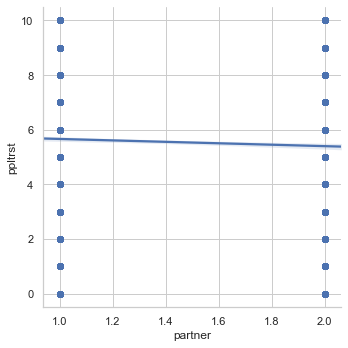

In [55]:
sns.lmplot(x="partner", y="ppltrst",
           data=df6);

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [57]:
df7 = df[df['year']==7]

In [74]:
cat1 = df7[df7['cntry']=='CH'].groupby('year').mean()
cat2 = df7[df7['cntry']=='NO'].groupby('year').mean()
cat3 = df7[df7['cntry']=='ES'].groupby('year').mean()

In [75]:
cat1

,idno,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
year,,,,,,,,,,,
7,1480.680466,3.065977,5.751617,6.219922,5.67141,8.116429,5.160622,2.781699,1.51229,46.141145,1.376455


In [76]:
stats.kruskal(cat1['sclmeet'], cat2['sclmeet'], cat3['sclmeet'])

KruskalResult(statistic=2.0, pvalue=0.36787944117144245)

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [84]:
df7['age_gr'] = pd.qcut(df7['agea'], q=4)

In [111]:
cat1 = df7[df7['cntry']=='CH'].groupby('age_gr').mean()
cat2 = df7[df7['cntry']=='NO'].groupby('age_gr').mean()
cat3 = df7[df7['cntry']=='ES'].groupby('age_gr').mean()

In [112]:
cat1['sclact'].mean, cat2['sclact'].mean, cat3['sclact'].mean

(<bound method Series.mean of age_gr
 (14.999, 33.0]    2.793427
 (33.0, 47.0]      2.807692
 (47.0, 62.0]      2.766304
 (62.0, 114.0]     2.768293
 Name: sclact, dtype: float64>, <bound method Series.mean of age_gr
 (14.999, 33.0]    2.927083
 (33.0, 47.0]      2.795580
 (47.0, 62.0]      2.762162
 (62.0, 114.0]     2.950000
 Name: sclact, dtype: float64>, <bound method Series.mean of age_gr
 (14.999, 33.0]    2.723549
 (33.0, 47.0]      2.677741
 (47.0, 62.0]      2.655629
 (62.0, 114.0]     2.393822
 Name: sclact, dtype: float64>)

In [96]:
stats.kruskal(cat1['sclact'], cat2['sclact'], cat3['sclact'])

KruskalResult(statistic=7.7307692307692335, pvalue=0.020954861324889128)

In [ ]:
Yes, here is the difference between countries